# Loan Application Status Project

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Importing important Libraries

In [99]:
df=pd.read_csv('Loan_app.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loading the Dataset into DataFrame and checking the first five rows

In [100]:
df.shape

(614, 13)

Showing 614 Rows and 13 Columns

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Showing Data Type and Numbers

In [102]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

# Using Mode and Mean to fill the missing Data

In [103]:
print(df['Gender'].mode())
print(df['Married'].mode())
print(df['Dependents'].mode())
print(df['Self_Employed'].mode())
print(df['Credit_History'].mode())


0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object
0    1.0
dtype: float64


In [104]:
df['Gender']=df['Gender'].fillna('Male')
df['Married']=df['Married'].fillna('Yes')
df['Dependents']=df['Dependents'].fillna('0')
df['Dependents']=df['Dependents'].replace('3+','3')
df['Self_Employed']=df['Self_Employed'].fillna('No')
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(1.0)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [105]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:>

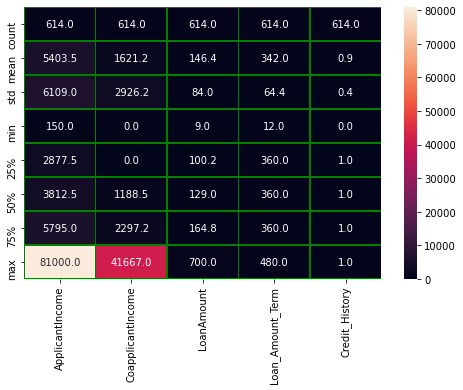

In [106]:
plt.figure(figsize=(8,5))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='green',fmt='0.1f')

In [107]:
(df==0).astype(bool).sum(axis=0)

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

# Skewness of Columns

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Dependents           1.015551
Credit_History      -2.021971
Loan_Amount_Term    -2.389680
dtype: float64


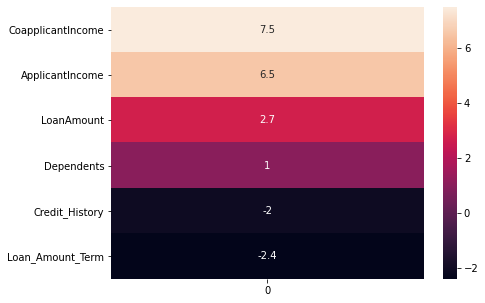

In [109]:
skew=df.skew().sort_values(ascending=False)
print(skew)
skew1=pd.DataFrame(skew)
plt.figure(figsize=(7,5))
sns.heatmap(skew1,annot=True)
plt.show()

In [ ]:
Here we see that

# Correlation Heatmap

LoanAmount           1.000000
ApplicantIncome      0.565620
CoapplicantIncome    0.187828
Loan_Amount_Term     0.038801
Credit_History      -0.001431
Name: LoanAmount, dtype: float64


<AxesSubplot:>

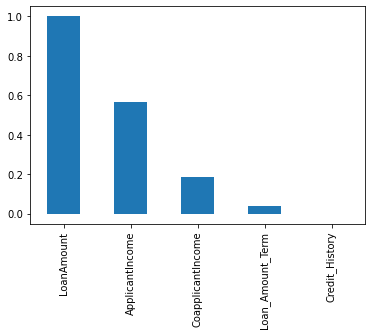

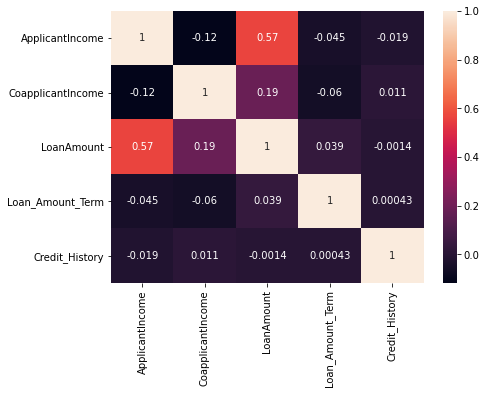

In [168]:
cor=df.corr()['LoanAmount'].sort_values(ascending=False)
print(cor)
cor.plot(kind='bar')
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)

Here we see that  Applican Income and Loan Amount are highly corelated.

# Plots and Graphs

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

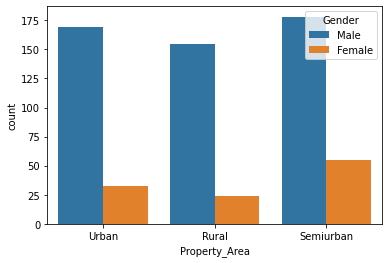

In [111]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area',data=df,hue='Gender')

It shows Numerical count of Property Area according to Gender

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


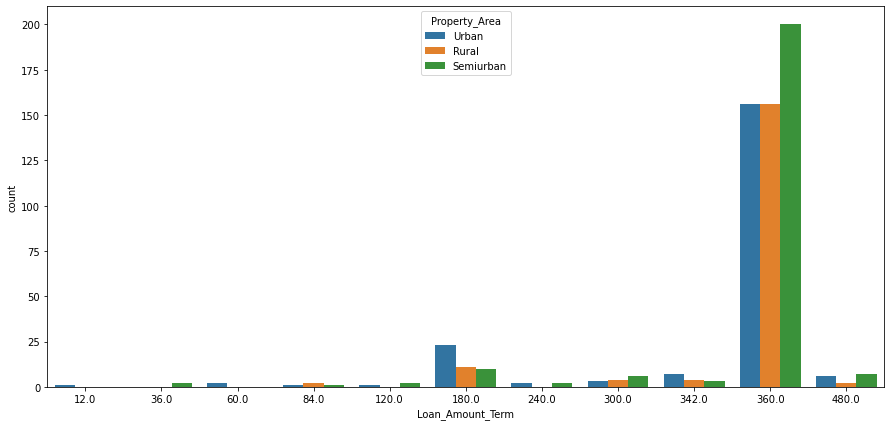

In [112]:
print(df['Loan_Amount_Term'].value_counts())
plt.figure(figsize=(15,7))
sns.countplot(x='Loan_Amount_Term',data=df,hue='Property_Area')
plt.show()

In [ ]:
It shows Numerical count of Loan AMount Term according to Gender

Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

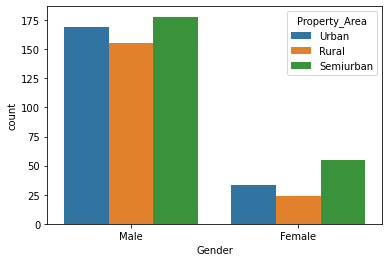

In [169]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,hue='Property_Area')

In [ ]:
It shows Numerical count of Gender according to Property Area.

Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

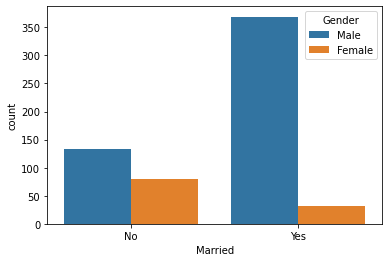

In [170]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df,hue='Gender')

It shows Numerical count of Married according to Gender

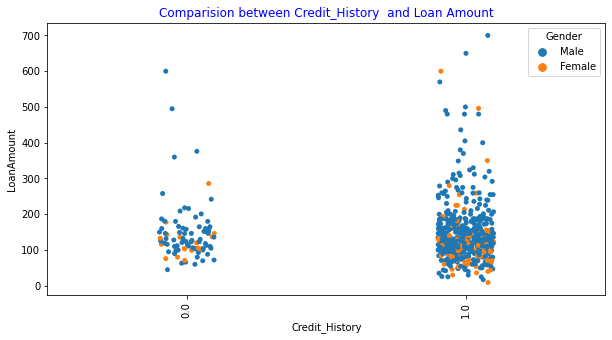

In [172]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('Comparision between Credit_History  and Loan Amount',color='blue')
sns.stripplot(x='Credit_History',y='LoanAmount',data=df,hue='Gender')
plt.show()

This Plot shws that Credit History of '1' has high Loan Amount.

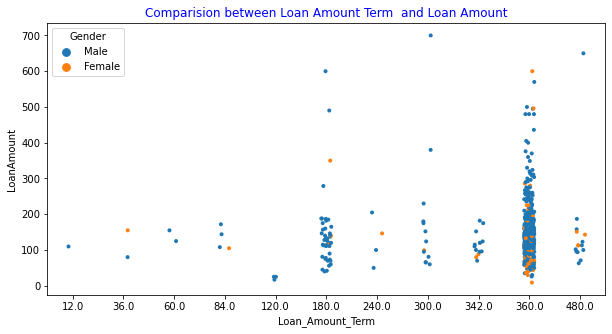

In [116]:
plt.figure(figsize=(10,5))
plt.title('Comparision between Loan Amount Term  and Loan Amount',color='blue')
sns.stripplot(x='Loan_Amount_Term',y='LoanAmount',data=df,size=4,hue='Gender')
plt.show()

Here we see that Most Loan Term is 360 months.

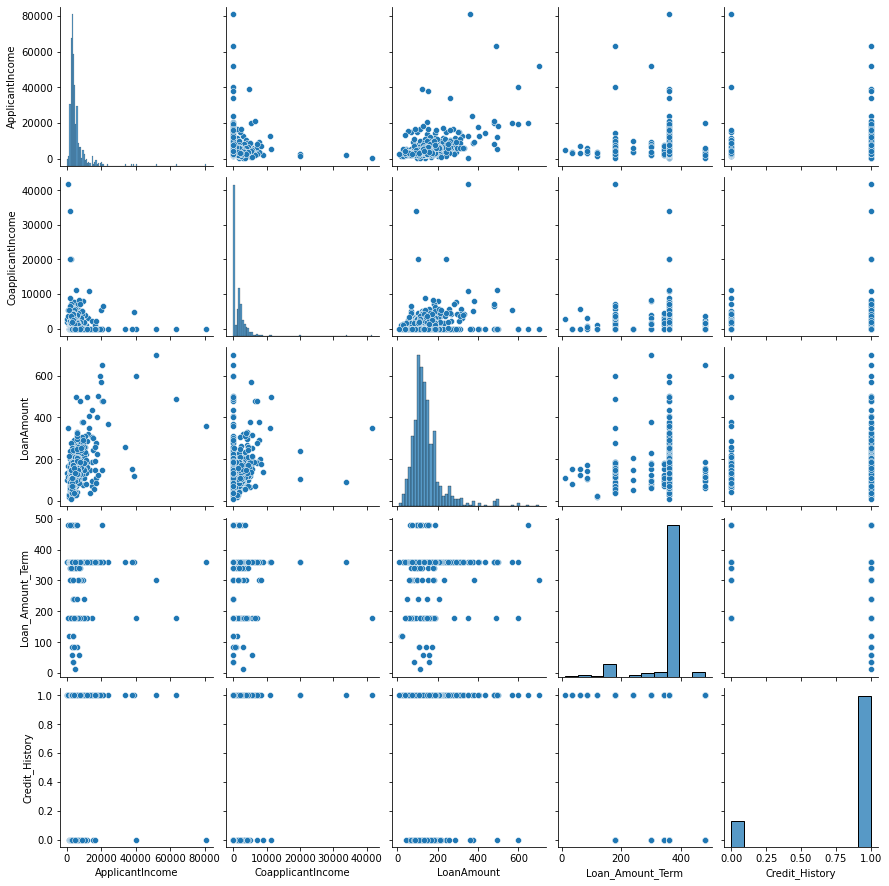

In [118]:
sns.pairplot(df)

This Plot shows Plot between Columns.

In [120]:
df1=df.drop('Loan_ID',axis=1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Column Loan ID is removed as all the values are unique.

In [121]:
df1['Dependents']=df1['Dependents'].astype(int,errors='raise')
df1['Credit_History']=df1['Credit_History'].astype(int,errors='raise')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 52.9+ KB


Here Dependents ad Credit_History Columns are converetd into Integer Type Data so that the numbers can be evaluated,

# Label Encoding Columns

We use Label Encoding so that all the object type data can be converted intonumbers for Testing and Training.

In [123]:
from sklearn.preprocessing import LabelEncoder

In [124]:
lenc=LabelEncoder()
for i in df1.columns:
    df1[i]=lenc.fit_transform(df1[i])
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,9,1,2,1
1,1,1,1,0,0,306,60,81,9,1,0,0
2,1,1,0,0,1,139,0,26,9,1,2,1
3,1,1,0,1,0,90,160,73,9,1,2,1
4,1,0,0,0,0,381,0,94,9,1,2,1


# Removing Outliers

In [ ]:
We remove Outlier from the data for better accuracy.

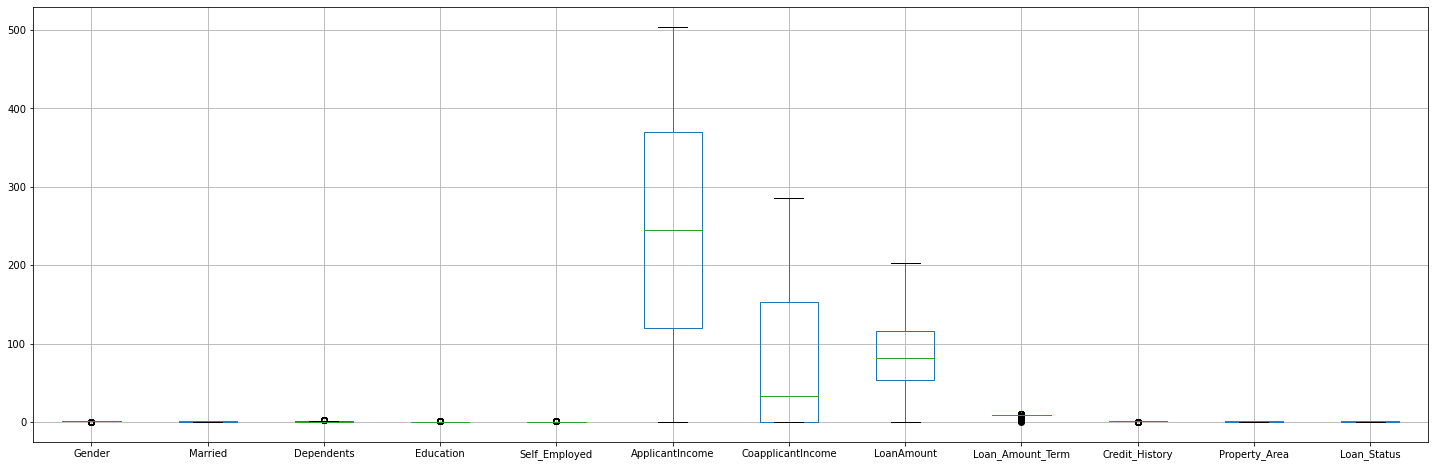

In [125]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
df1.boxplot()
plt.show()

In [127]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
df1.apply(zscore)
threshold=3
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)
print(602/614)
df2.head()

(614, 12)
(602, 12)
0.9804560260586319


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,100,9,1,2,1
1,1,1,1,0,0,306,60,81,9,1,0,0
2,1,1,0,0,1,139,0,26,9,1,2,1
3,1,1,0,1,0,90,160,73,9,1,2,1
4,1,0,0,0,0,381,0,94,9,1,2,1


# Train, Test Split

In [ ]:
Here

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df1.drop(['Loan_Status'],axis=1)
print(x.shape)
y1=df1['Loan_Status'].to_numpy()
y=pd.DataFrame(y1)
print(y.shape)
print(y1.shape)

(614, 11)
(614, 1)
(614,)


In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491, 1)
(123, 1)


# Since the Target is binary 'Y' or 'N' , it is a Classification Problem. Hence we use Classifier to predict the accuracy of the target. 

# 1. Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [131]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.8126938775510204


In [132]:
lg=LogisticRegression(C=100,penalty='l2')
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,predlg)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,predlg))
print('Classification Report',classification_report(y_test,predlg))

Accuracy Report is 78.86178861788618 Percentage
Confusion Matrix 
 [[19 24]
 [ 2 78]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.76      0.97      0.86        80

    accuracy                           0.79       123
   macro avg       0.83      0.71      0.73       123
weighted avg       0.81      0.79      0.77       123



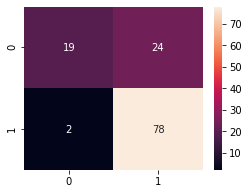

In [133]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predlg),annot=True)
plt.show()

# 2. Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
grid= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtc1=DecisionTreeClassifier()
dtc1_cv=GridSearchCV(dtc1,grid,cv=5)
dtc1_cv.fit(x_train,y_train)
print("Tuned hpyerparameters :(best parameters) ",dtc1_cv.best_params_)
print("Accuracy :",dtc1_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
Accuracy : 0.8065347351061638


In [136]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Report is',accuracy_score(y_test,preddtc)*100,'Percentage')
print('Confusion Matrix','\n',confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

Accuracy Report is 78.04878048780488 Percentage
Confusion Matrix 
 [[18 25]
 [ 2 78]]
Classification Report               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



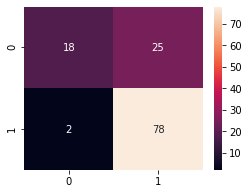

In [137]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,preddtc),annot=True)
plt.show()

# 3. Support Vector Classifier

In [138]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [139]:
svm1=SVC()
gamma_range=[0.01, 0.1, 1, 10, 100,1000]
c_range=[0.001,0.01, 0.1, 1, 10, 100]
grid= dict(gamma = gamma_range, C = c_range)
svm1_cv=GridSearchCV(svm1,grid,cv=5)
svm1_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm1_cv.best_params_)
print("accuracy :",svm1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.01}
accuracy : 0.6965367965367965


In [140]:
svc=SVC(C=0.001,gamma=0.01)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predsvc))
print('Confusion Matrix',confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

Accuracy Score 0.6504065040650406
Confusion Matrix [[ 0 43]
 [ 0 80]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



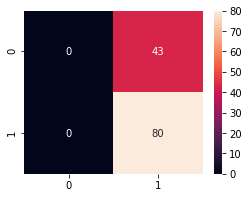

In [141]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predsvc),annot=True)
plt.show()

# 4. K-Neighbors Classifier

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [144]:
knn1=KNeighborsClassifier()
k_range=list(range(1,30))
grid=dict(n_neighbors=k_range)
parameters={'leaf_size':[1,3,5],'algorithm':['auto','kd_tree'],'n_jobs':[-1]}
knn_cv=GridSearchCV(knn1,grid,cv=10,scoring='accuracy',param_grid=parameters)
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 29}
Accuracy : 0.6863673469387754


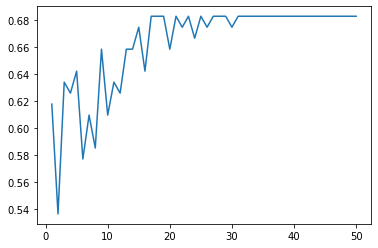

In [145]:
from sklearn import metrics
k_range = list(range(1, 51))
scores = []
for i in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    y_pred = knn2.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.show()

In [146]:
knn=KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predknn))
print('Confusion Matrix','\n',confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.6829268292682927
Confusion Matrix 
 [[ 0 39]
 [ 0 84]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      1.00      0.81        84

    accuracy                           0.68       123
   macro avg       0.34      0.50      0.41       123
weighted avg       0.47      0.68      0.55       123



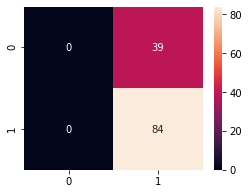

In [147]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predknn),annot=True)
plt.show()

# 5. Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfc1=RandomForestClassifier()
parameters={'n_estimators':[200,500],'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']
}
rfc_cv=GridSearchCV(rfc1,parameters,cv=10)
rfc_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("Accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}
Accuracy : 0.8147346938775509


In [150]:
rfc=RandomForestClassifier(random_state=42,max_features='auto',criterion='gini',max_depth=7,n_estimators=500)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrfc))
print('Confusion Matrix','\n',confusion_matrix(y_test,predrfc))
print('Classification Report',classification_report(y_test,predrfc))

Accuracy Score 0.7886178861788617
Confusion Matrix 
 [[16 23]
 [ 3 81]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.41      0.55        39
           1       0.78      0.96      0.86        84

    accuracy                           0.79       123
   macro avg       0.81      0.69      0.71       123
weighted avg       0.80      0.79      0.76       123



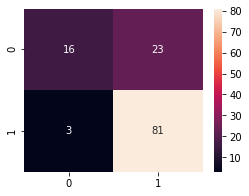

In [151]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predrfc),annot=True)
plt.show()

# 6. AdaBoost Classifier

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [176]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print('Confusion Matrix','\n',confusion_matrix(y_test,predad))
print('Classification Report',classification_report(y_test,predad))

Accuracy Score 0.7235772357723578
Confusion Matrix 
 [[17 26]
 [ 8 72]]
Classification Report               precision    recall  f1-score   support

           0       0.68      0.40      0.50        43
           1       0.73      0.90      0.81        80

    accuracy                           0.72       123
   macro avg       0.71      0.65      0.65       123
weighted avg       0.72      0.72      0.70       123



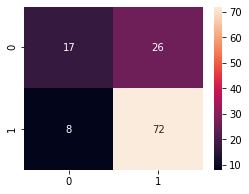

In [177]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predad),annot=True)
plt.show()

# Cross Validation Score

In [174]:
from sklearn.model_selection import cross_val_score

In [179]:
model=[lg,dtc,svc,knn,rfc,ad]
for i in model:
    score=cross_val_score(i,x,y,cv=10)
    print('Cross Val Score of',i,'=',score)
    print('Mean Score of',i,'=',score.mean())
    print('Difference of Accuracy in',i,'and Cross Val Score of',i,'is=',accuracy_score(y_test,i.predict(x_test))-score.mean())
    print('\n') 

Cross Val Score of LogisticRegression(C=100) = [0.80645161 0.82258065 0.75806452 0.75806452 0.78688525 0.78688525
 0.86885246 0.85245902 0.78688525 0.83606557]
Mean Score of LogisticRegression(C=100) = 0.8063194077207825
Difference of Accuracy in LogisticRegression(C=100) and Cross Val Score of LogisticRegression(C=100) is= -0.009571440241107676


Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = [0.80645161 0.77419355 0.74193548 0.69354839 0.80327869 0.7704918
 0.85245902 0.80327869 0.80327869 0.81967213]
Mean Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) = 0.7868588048651507
Difference of Accuracy in DecisionTreeClassifier(criterion='entropy', max_depth=4) and Cross Val Score of DecisionTreeClassifier(criterion='entropy', max_depth=4) is= 0.009889162614524105


Cross Val Score of SVC(C=0.001, gamma=0.01) = [0.69354839 0.69354839 0.67741935 0.67741935 0.68852459 0.68852459
 0.68852459 0.68852459 0.68852459 0.68852459]
Mean Score of SVC(C

# # Conclusion

Here Random Forest Classifier give the highest accuracy score. Hence we use rfc for Testing of Dataset.

# Saving the Model

In [180]:
import joblib

In [181]:
joblib.dump(rfc,'bankad.org')

['bankad.org']

In [182]:
bankfile=joblib.load('bankad.org')